In [ ]:
import pandas as pd
data = pd.read_csv("Hamspam.csv",encoding = "ISO-8859-1")

In [ ]:
data.head()

,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or å£10,000..."
4,spam,okmail: Dear Dave this is your final notice to...


In [ ]:
data.isnull().sum()

,0
type,0
text,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5559 entries, 0 to 5558
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    5559 non-null   object
 1   text    5559 non-null   object
dtypes: object(2)
memory usage: 87.0+ KB


# Data Cleaning

In [ ]:
import re #regular expression
import string

def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda x: clean_text(x)


In [ ]:
data['text'] = data.text.apply(clean)
data.text

,text
0,hope you are having a good week just checking in
1,kgive back my thanks
2,am also doing in cbe only but have to pay
3,complimentary star ibiza holiday or å£ cash n...
4,okmail dear dave this is your final notice to ...
...,...
5554,you are a great role model you are giving so m...
5555,awesome i remember the last time we got somebo...
5556,if you dont your prize will go to another cust...
5557,sms ac jsco energy is high but u may not know ...


In [ ]:
#Word frequency
freq = pd.Series(' '.join(data['text']).split()).value_counts()[:20] # for top 20
freq

,count
to,2243
i,2228
you,2118
a,1437
the,1323
u,1298
and,965
is,892
in,886
me,789


In [ ]:
#removing stopwords

import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop = stopwords.words('english')
data['text'] = data['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data.shape

(5559, 2)

In [ ]:
#word frequency after removal of stopwords
freq_Sw = pd.Series(' '.join(data['text']).split()).value_counts()[:20] # for top 20
freq_Sw

,count
u,1298
call,577
im,462
ur,389
get,384
å£,293
dont,287
go,282
ok,278
free,275


In [ ]:
# count vectoriser tells the frequency of a word.
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
vectorizer = CountVectorizer(min_df = 1, max_df = 0.9)
X = vectorizer.fit_transform(data["text"])
# Use get_feature_names_out() instead of get_feature_names()
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names_out(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])
#print(word_freq_df.sort('occurrences',ascending = False).head())

In [ ]:
word_freq_df.head(30)

,term,occurrences,frequency
0,aa,1,0.000022
1,aah,3,0.000065
2,aaniye,1,0.000022
3,aaooooright,1,0.000022
4,aathilove,3,0.000065
5,aathiwhere,3,0.000065
6,ab,1,0.000022
7,abbey,1,0.000022
8,abdomen,1,0.000022
9,abeg,1,0.000022


In [ ]:
#TFIDF - Term frequency inverse Document Frequencyt
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True) #keep top 1000 words
doc_vec = vectorizer.fit_transform(data["text"])
names_features = vectorizer.get_feature_names_out()
dense = doc_vec.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns = names_features)

In [ ]:
df

,abiola,able,abt,accept,access,account,actually,add,address,admirer,...,youve,yr,yrs,yup,ââ,ââèïs,ââèït,ûªs,ûªt,ûï
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5554,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5555,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# N-gram

In [ ]:
#Bi-gram

def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1],
                reverse=True)
    return words_freq[:n]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
top2_words = get_top_n2_words(data["text"], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head()

,Bi-gram,Freq
0,please call,53
1,call later,50
2,ill call,48
3,let know,40
4,sorry ill,39


<ipython-input-22-8ad2e7024b98>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(rotation=45,labels = top20_bigram["Bi-gram"])


[Text(0, 0, 'please call'),
 Text(1, 0, 'call later'),
 Text(2, 0, 'ill call'),
 Text(3, 0, 'let know'),
 Text(4, 0, 'sorry ill'),
 Text(5, 0, 'dont know'),
 Text(6, 0, 'good morning'),
 Text(7, 0, 'po box'),
 Text(8, 0, 'call landline'),
 Text(9, 0, 'take care'),
 Text(10, 0, 'im going'),
 Text(11, 0, 'guaranteed call'),
 Text(12, 0, 'new year'),
 Text(13, 0, 'prize guaranteed'),
 Text(14, 0, 'ok lor'),
 Text(15, 0, 'pls send'),
 Text(16, 0, 'every week'),
 Text(17, 0, 'send stop'),
 Text(18, 0, 'good night'),
 Text(19, 0, 'im gonna')]

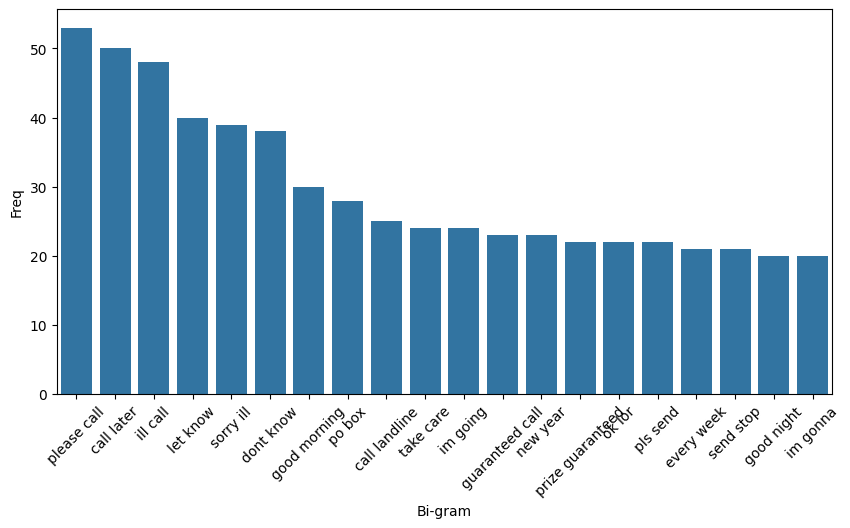

In [ ]:
#Bi-gram plot
import matplotlib.pyplot as plt
import seaborn as sns
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_bigram["Bi-gram"])

In [ ]:
#Tri-gram
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3),
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1],
                reverse=True)
    return words_freq[:n]


In [ ]:
top3_words = get_top_n3_words(data["text"], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]

In [ ]:
top3_df

,Tri-gram,Freq
0,ill call later,42
1,sorry ill call,38
2,prize guaranteed call,21
3,call land line,18
4,happy new year,18
...,...,...
195,said mind go,5
196,mind go bedroom,5
197,go bedroom minute,5
198,bedroom minute ok,5


<ipython-input-26-785b9243dc80>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(rotation=45,labels = top20_trigram["Tri-gram"])


[Text(0, 0, 'ill call later'),
 Text(1, 0, 'sorry ill call'),
 Text(2, 0, 'prize guaranteed call'),
 Text(3, 0, 'call land line'),
 Text(4, 0, 'happy new year'),
 Text(5, 0, 'private account statement'),
 Text(6, 0, 'guaranteed call land'),
 Text(7, 0, 'call identifier code'),
 Text(8, 0, 'land line claim'),
 Text(9, 0, 'draw shows prize'),
 Text(10, 0, 'shows prize guaranteed'),
 Text(11, 0, 'identifier code expires'),
 Text(12, 0, 'pls send message'),
 Text(13, 0, 'account statement shows'),
 Text(14, 0, 'statement shows unredeemed'),
 Text(15, 0, 'camcorder reply call'),
 Text(16, 0, 'cant pick phone'),
 Text(17, 0, 'pick phone right'),
 Text(18, 0, 'phone right pls'),
 Text(19, 0, 'right pls send')]

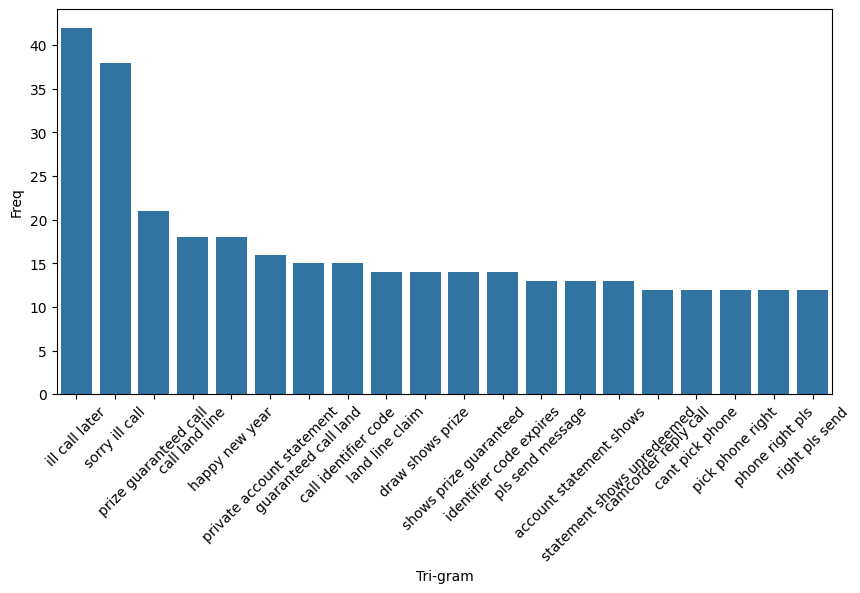

In [ ]:
#Tri-gram plot
import seaborn as sns
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_trigram["Tri-gram"])

# WordCloud

In [ ]:
string_Total = " ".join(data["text"])

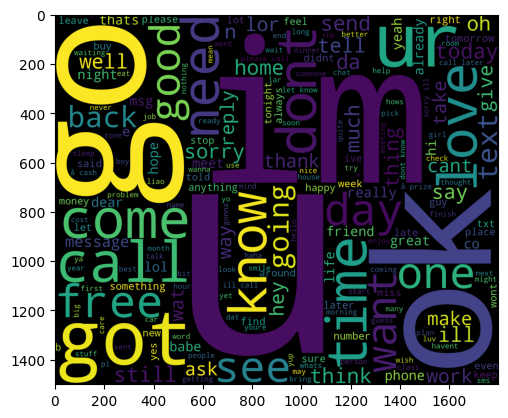

In [ ]:
#wordcloud for entire corpus
from wordcloud import WordCloud
wordcloud_stw = WordCloud(
                background_color= 'black',
                width = 1800,
                height = 1500
                ).generate(string_Total)
plt.imshow(wordcloud_stw)

# Applying naive bayes for classification

In [ ]:
data.head()

,type,text
0,ham,hope good week checking
1,ham,kgive back thanks
2,ham,also cbe pay
3,spam,complimentary star ibiza holiday å£ cash needs...
4,spam,okmail dear dave final notice collect tenerife...


In [ ]:
def split_into_words(i):
    return (i.split(" "))


In [ ]:
from sklearn.model_selection import train_test_split

email_train,email_test = train_test_split(data,test_size=0.3)

In [ ]:
email_train

,type,text
5199,ham,ask g iouri ive told story like ten times already
2744,ham,time tell friend around
3383,ham,hope feeling great pls fill abiola
4818,spam,tried contact response offer new nokia fone ca...
1999,ham,think might give miss teaching til twelve lect...
...,...,...
3146,ham,send id password
1400,ham,water logging desert geoenvironmental implicat...
4619,ham,forgot ask u smth theres card da present lei u...
3605,ham,went ur hon lab one


In [ ]:
# Preparing email texts into word count matrix format
emails_bow = CountVectorizer(analyzer=split_into_words).fit(data.text)

# ["mailing","body","texting"]
# ["mailing","awesome","good"]

# ["mailing","body","texting","good","awesome"]



#        "mailing" "body" "texting" "good" "awesome"
#  0          1        1       1        0       0

#  1          1        0        0       1       1



In [ ]:
# For all messages
all_emails_matrix = emails_bow.transform(data.text)
all_emails_matrix.shape

(5559, 8175)

In [ ]:
# For training messages
train_emails_matrix = emails_bow.transform(email_train.text)
train_emails_matrix.shape # (3891,8175)

# For testing messages
test_emails_matrix = emails_bow.transform(email_test.text)
test_emails_matrix.shape # (1668,8175)

(1668, 8175)

In [ ]:
####### Without TFIDF matrices ########################
# Preparing a naive bayes model on training data set

from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB

# Multinomial Naive Bayes
import numpy as np
classifier_mb = MB()
classifier_mb.fit(train_emails_matrix,email_train.type)
train_pred_m = classifier_mb.predict(train_emails_matrix)
accuracy_train_m = np.mean(train_pred_m==email_train.type)
print(accuracy_train_m) # 98%

test_pred_m = classifier_mb.predict(test_emails_matrix)
accuracy_test_m = np.mean(test_pred_m==email_test.type) # 96%
print(accuracy_test_m)


0.9897198663582627
0.9682254196642686


In [ ]:
# Gaussian Naive Bayes9-0
classifier_gb = GB()
classifier_gb.fit(train_emails_matrix.toarray(),email_train.type.values) # we need to convert tfidf into array format which is compatible for gaussian naive bayes
train_pred_g = classifier_gb.predict(train_emails_matrix.toarray())
accuracy_train_g = np.mean(train_pred_g==email_train.type) # 95%
print(accuracy_train_g )
test_pred_g = classifier_gb.predict(test_emails_matrix.toarray())
accuracy_test_g = np.mean(test_pred_g==email_test.type) # 90%
print(accuracy_test_g)

0.9498843484965305
0.8908872901678657


# Using TFIDF

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

# Learning Term weighting and normalizing on entire emails
tfidf_transformer = TfidfTransformer().fit(all_emails_matrix)

# Preparing TFIDF for train emails
train_tfidf = tfidf_transformer.transform(train_emails_matrix)

print(train_tfidf.shape) # (3891, 6661)

# Preparing TFIDF for test emails
test_tfidf = tfidf_transformer.transform(test_emails_matrix)

print(test_tfidf.shape) #  (1668, 6661)



(3891, 8175)
(1668, 8175)


In [ ]:
# Preparing a naive bayes model on training data set

from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB

# Multinomial Naive Bayes
classifier_mb = MB()
classifier_mb.fit(train_tfidf,email_train.type)
train_pred_m = classifier_mb.predict(train_tfidf)
accuracy_train_m = np.mean(train_pred_m==email_train.type) # 96%
print(accuracy_train_m)
test_pred_m = classifier_mb.predict(test_tfidf)
accuracy_test_m = np.mean(test_pred_m==email_test.type) # 96%
print(accuracy_test_m)



0.970958622462092
0.9574340527577938


In [ ]:
accuracy_train_m

In [ ]:
# Gaussian Naive Bayes
classifier_gb = GB()
classifier_gb.fit(train_tfidf.toarray(),email_train.type.values) # we need to convert tfidf into array format which is compatible for gaussian naive bayes
train_pred_g = classifier_gb.predict(train_tfidf.toarray())
accuracy_train_g = np.mean(train_pred_g==email_train.type) # 95%
test_pred_g = classifier_gb.predict(test_tfidf.toarray())
accuracy_test_g = np.mean(test_pred_g==email_test.type) # 88%

# inplace of tfidf we can also use train_emails_matrix and test_emails_matrix instead of term inverse document frequency matrix

In [ ]:
accuracy_test_g

0.8872901678657075

In [ ]:
accuracy_train_g

0.9498843484965305